In [1]:
import pyarrow
import fastparquet
import numpy as np
import pandas as pd

# For Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)

In [3]:
print(pyarrow.__version__)

19.0.0


In [4]:
print(fastparquet.__version__)

2024.11.0


- Fam file contains population/sample information
- Bim file contains information on the SNP position (basepair and centimorgan)
- parquet file contains the snp data

- Below is examples of how to read the data using pandas/numpy.
- I have also included a .eigenstratgeno file, which is a raw text file with the SNP data. It is large, and slow to read, so i would recommend the parquet file.

# - *Fam*

In [5]:
fam = pd.read_csv("HO_data/HO_data_filtered/HumanOrigins2067_filtered.fam", delimiter = " ", header = None).to_numpy()

In [6]:
fam

array([['AA', 'AD_066', 0, 0, 0, 1],
       ['AA', 'AD_064', 0, 0, 0, 1],
       ['AA', 'AD_505', 0, 0, 0, 1],
       ...,
       ['Zapotec', 'Zapo0091', 0, 0, 0, 1],
       ['Zapotec', 'Zapo0095', 0, 0, 0, 1],
       ['Zapotec', 'Zapo0097', 0, 0, 0, 1]], dtype=object)

- `dtype('0')` in NumPy stands for "object" data type. This means that the array contains Python objects (e.g., strings, mixed types, or other non-primitive types).


In [9]:
columns = ["Family_ID", "Individual_ID", "Paternal_ID", "Maternal_ID", "Sex", "Phenotype"]

fam_df = pd.read_csv("HO_data/HO_data_filtered/HumanOrigins2067_filtered.fam", sep="\s+", names=columns)

In [10]:
fam_df.head()

,Family_ID,Individual_ID,Paternal_ID,Maternal_ID,Sex,Phenotype
0,AA,AD_066,0,0,0,1
1,AA,AD_064,0,0,0,1
2,AA,AD_505,0,0,0,1
3,AA,AD_523,0,0,0,1
4,AA,AD_500,0,0,0,1


In [15]:
fam_df.Family_ID.value_counts()

Family_ID
Yoruba             70
French             61
Turkish            56
Spanish            53
Han                43
                   ..
Datog               3
Australian          3
Dolgan              3
Canary_Islander     2
Saami_WGA           1
Name: count, Length: 166, dtype: int64

In [21]:
(fam_df['Family_ID'] == "Yoruba").sum()

np.int64(70)

In [22]:
fam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Family_ID      2067 non-null   object
 1   Individual_ID  2067 non-null   object
 2   Paternal_ID    2067 non-null   int64 
 3   Maternal_ID    2067 non-null   int64 
 4   Sex            2067 non-null   int64 
 5   Phenotype      2067 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 97.0+ KB


In [23]:
fam_df.describe()

,Paternal_ID,Maternal_ID,Sex,Phenotype
count,2067.0,2067.0,2067.0,2067.0
mean,0.0,0.0,0.0,1.0
std,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,1.0
25%,0.0,0.0,0.0,1.0
50%,0.0,0.0,0.0,1.0
75%,0.0,0.0,0.0,1.0
max,0.0,0.0,0.0,1.0


In [24]:
# Count how many unique Family IDs
unique_families = np.unique(fam_df.iloc[:, 0])

f"Number of unique family IDs: {len(unique_families)}"

'Number of unique family IDs: 166'

In [25]:
duplicate_rows_fam_df = fam_df[fam_df.duplicated()]

"number of duplicate rows: ", duplicate_rows_fam_df.shape

('number of duplicate rows: ', (0, 6))

In [26]:
phenotype_column = fam_df.iloc[:, 5]

# Count the number of affected individuals
affected = np.sum(phenotype_column == 1)
print(f"Number of affected individuals: {affected}")

Number of affected individuals: 2067


# - *bim*
 *This `.bim file` is a `PLINK BIM` (binary map) file used in genetics and bioinformatics. It provides information about genetic variants (SNPs) in a dataset.*

In [29]:
bim = np.genfromtxt("HO_data/HO_data_filtered/HumanOrigins2067_filtered.bim", usecols=(0, 1, 2, 3, 4, 5), dtype=str)

In [36]:
bim[0]

array(['1', 'rs3094315', '0.020130', '752566', 'G', 'A'], dtype='<U16')

- `dtype('<U16')` in NumPy means that the array contains Unicode strings with a maximum length of 16 characters.

In [37]:
columns = ["Chromosome", "SNP_ID", "Genetic_Distance", "Position", "Ref_Allele", "Alt_Allele"]

bim_df = pd.read_csv("HO_data/HO_data_filtered/HumanOrigins2067_filtered.bim", sep="\s+", names=columns)

In [38]:
bim_df.head()

,Chromosome,SNP_ID,Genetic_Distance,Position,Ref_Allele,Alt_Allele
0,1,rs3094315,0.020130,752566,G,A
1,1,rs7419119,0.022518,842013,G,T
2,1,rs13302957,0.024116,891021,G,A
3,1,rs6696609,0.024457,903426,T,C
4,1,rs8997,0.025727,949654,A,G


In [39]:
bim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160858 entries, 0 to 160857
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Chromosome        160858 non-null  int64  
 1   SNP_ID            160858 non-null  object 
 2   Genetic_Distance  160858 non-null  float64
 3   Position          160858 non-null  int64  
 4   Ref_Allele        160858 non-null  object 
 5   Alt_Allele        160858 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 7.4+ MB


*.Chromosome 1*

*.`SNP ID`: unique identifier for this SNP - Reference SNP identifier -rsID*

*.`Genetic Distance`: cM - Centimorgans (may not always be used)*

*.`Physical Position`: this SNP is located at base pair 752,566 on chromosome 1*

*.`Reference Allele`: G - major allele*

*.`Alternative Allele`: A - minor allele*

In [27]:
bim_df.describe()

,Chromosome,Genetic_Distance,Position
count,160858.000000,160858.000000,1.608580e+05
mean,8.991744,0.930690,7.849409e+07
std,5.945411,0.590934,5.802305e+07
min,1.000000,0.000013,1.968800e+04
25%,4.000000,0.473851,3.021285e+07
50%,8.000000,0.848425,6.873518e+07
75%,13.000000,1.299260,1.164211e+08
max,22.000000,2.862305,2.491684e+08


In [33]:
bim_df_duplicate = bim_df[bim_df.duplicated()]

"number of duplicate rows: ", bim_df_duplicate.shape

('number of duplicate rows: ', (0, 6))

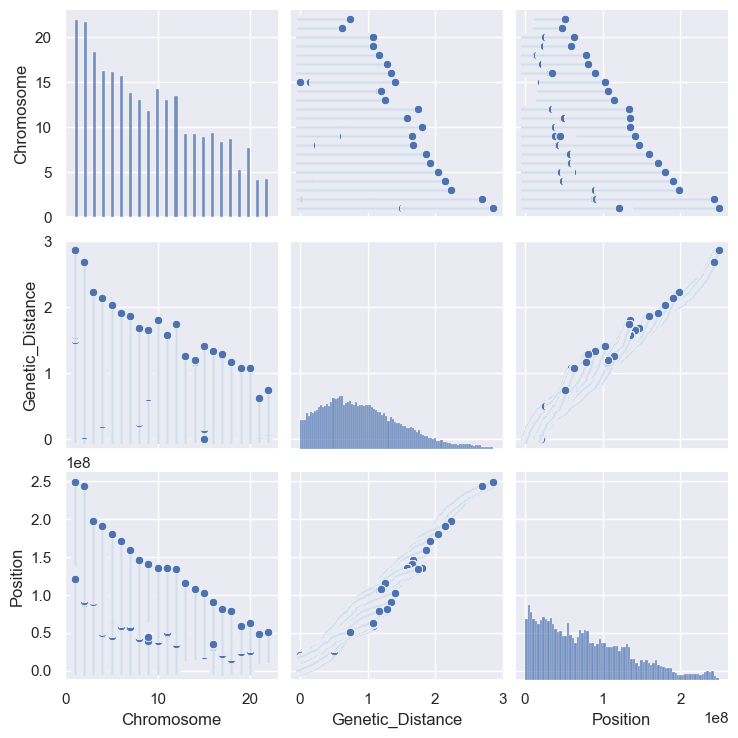

In [40]:
sns.pairplot(bim_df)

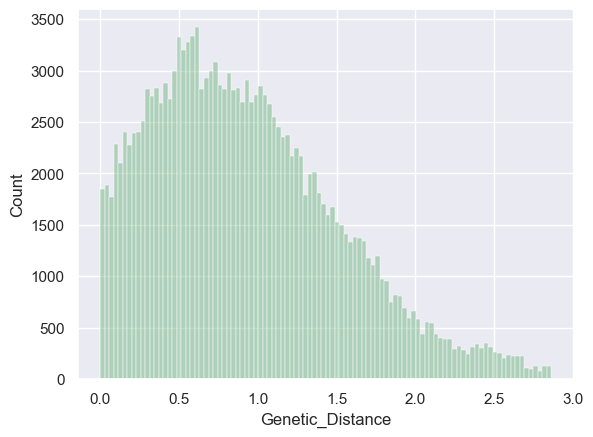

In [41]:
sns.histplot(bim_df['Genetic_Distance'], color='g', bins=100, alpha=0.4)
plt.show()

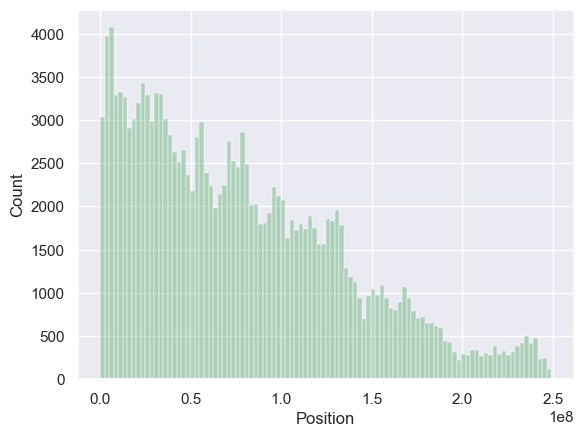

In [42]:
sns.histplot(bim_df['Position'], color='g', bins=100, alpha=0.4)
plt.show()

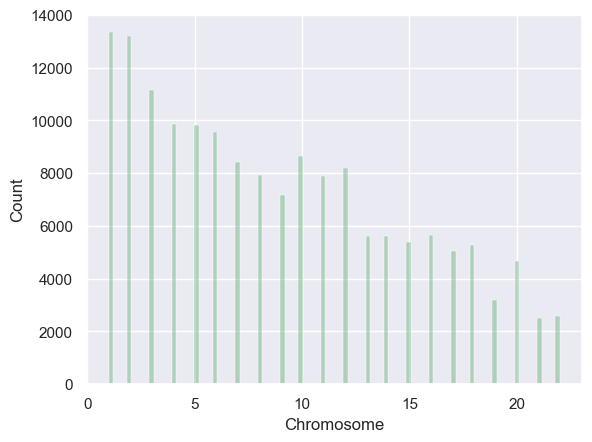

In [43]:
sns.histplot(bim_df['Chromosome'], color='g', bins=100, alpha=0.4)
plt.show()

In [44]:
list(set(bim_df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [45]:
bim_df_num = bim_df.select_dtypes(include = ['float64', 'int64'])
bim_df_num.head()

,Chromosome,Genetic_Distance,Position
0,1,0.020130,752566
1,1,0.022518,842013
2,1,0.024116,891021
3,1,0.024457,903426
4,1,0.025727,949654


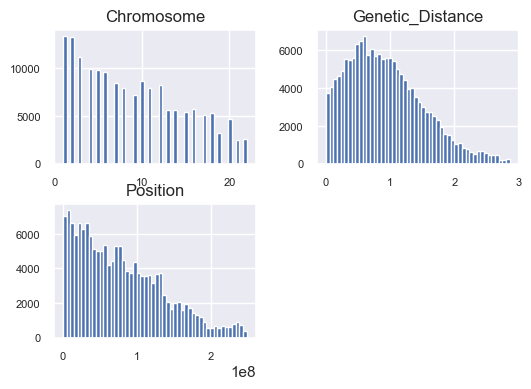

In [50]:
bim_df_num.hist(figsize=(6,4), bins=50, xlabelsize=8, ylabelsize=8);

# -*snp* 

In [4]:
ls -lh HO_data/HO_data_filtered/HumanOrigins2067_filtered.parquet

-rw-rw-r-- 1 rbashir rbashir 81M Jan 30 22:48 HO_data/HO_data_filtered/HumanOrigins2067_filtered.parquet


In [2]:
snp_data = pd.read_parquet("HO_data/HO_data_filtered/HumanOrigins2067_filtered.parquet").to_numpy()

In [3]:
# snp_data.head()

In [4]:
snp_data[:10]

array([[1., 1., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 2.],
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 1., 2., 1.]])

In [5]:
snp_data_df = pd.DataFrame(snp_data)

In [6]:
snp_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160858 entries, 0 to 160857
Columns: 2067 entries, 0 to 2066
dtypes: float64(2067)
memory usage: 2.5 GB


In [7]:
snp_data_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066
count,160858.000000,160858.000000,160858.000000,160858.000000,160858.000000,160858.000000,160858.000000,160858.000000,160858.000000,160858.000000,...,160858.000000,160858.000000,160858.000000,160858.000000,160858.000000,160858.000000,160858.000000,160858.000000,160858.000000,160858.000000
mean,0.456744,0.464658,0.439245,0.459324,0.447668,0.442800,0.463869,0.439095,0.449483,0.406253,...,0.363165,0.378396,0.352771,0.353921,0.462911,0.351733,0.355842,0.349812,0.354008,0.352273
std,0.857356,0.880367,0.738240,0.869027,0.802155,0.764393,0.866785,0.755820,0.820976,0.775762,...,0.810500,0.874970,0.757996,0.748606,1.216274,0.749528,0.773293,0.737285,0.761679,0.751060
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [8]:
snp_data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066
0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,1.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- *This dataset contains genotype data for `160,858` individuals across `2,067` SNP markers. The values `(0, 1, 2)` represent different genotype states for each SNP, indicating the genetic variation between individuals.*

- *`Rows`: Each row corresponds to a person in the dataset - 160,858 individuals (rows)*

- *`Columns`: Each column corresponds to a specific SNP marker- 2,067 SNP markers (columns)*

- *`Values`: The values represent the genotypes for each individual and SNP. Genotypes are typically represented as:*

    *`0: Homozygous` reference (e.g., the individual has two copies of the reference allele).*

    *`1: Heterozygous` (e.g., the individual has one copy of the reference allele and one copy of the alternate allele).*

    *`2: Homozygous` alternate (e.g., the individual has two copies of the alternate allele).*


In [8]:
# Check for missing values
missing_values = snp_data_df.isnull().sum()  # Sum of missing values per column
print(missing_values)

0       0
1       0
2       0
3       0
4       0
       ..
2062    0
2063    0
2064    0
2065    0
2066    0
Length: 2067, dtype: int64


## *1- Distribution of SNP Genotypes*

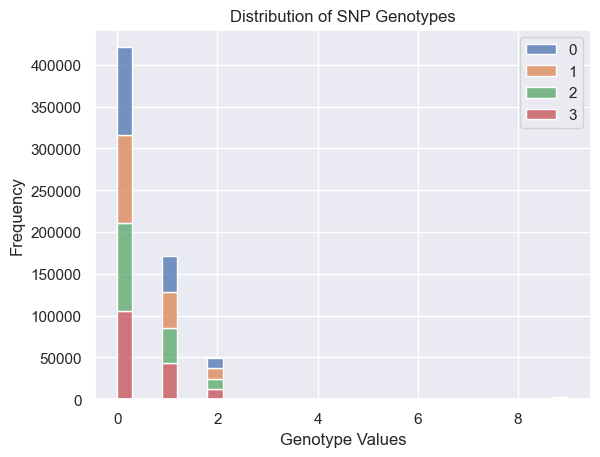

In [10]:
# Plot the distribution of genotypes for the first few SNPs
sns.histplot(snp_data_df.iloc[:, :4], kde=False, bins=30, multiple="stack")
plt.title("Distribution of SNP Genotypes")
plt.xlabel("Genotype Values")
plt.ylabel("Frequency")
plt.show()

## *2- Investigate Allele Frequencies*

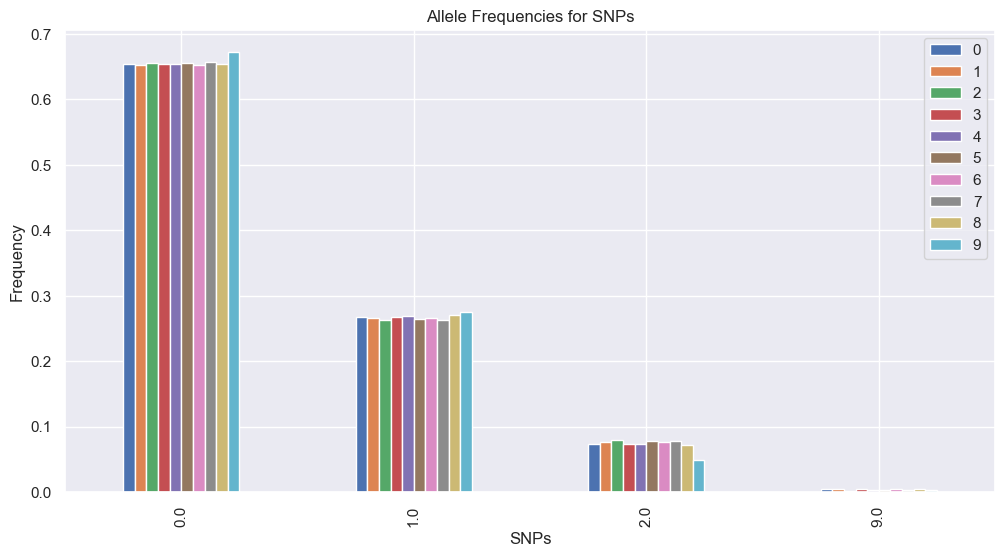

In [13]:
# Calculate the frequency of each genotype for each SNP
allele_freq = snp_data_df.iloc[:, :].apply(lambda x: x.value_counts(normalize=True))

# Plot allele frequencies for a subset of SNPs
allele_freq.iloc[:, :10].plot(kind="bar", figsize=(12, 6))
plt.title("Allele Frequencies for SNPs")
plt.xlabel("SNPs")
plt.ylabel("Frequency")
plt.show()
